### This Notebook is to test the Monte Carlo facilities of PyNeb. It is aimed to compare results obtained with keyword 'orig', which are the results using the original data, with the results obtained with keyword 'median'. All the getCrossTemDen are made using Machine Learning. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [3]:
pn.log_.level = 2
Te_corr = 3000
if Te_corr is None:
    PDF_name = 'figures/NGC6778_NoCorr'
else:
    PDF_name = 'figures/NGC6778_b_{}'.format(Te_corr)

PL = pipeline.PipeLine(data_dir = '/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/NGC6778_MUSEstat_maps/maps',
                       name = 'NGC6778_MUSE_b_*.fits', error_str='error', err_default=0.05,
                       PDF_name=PDF_name)

PL.obs.addSum(('O1r_7771A', 'O1r_7773A', 'O1r_7775A'), 'O1r_7773+')

PL.obs.removeLine('O1r_7771A')
PL.obs.removeLine('O1r_7773A')
PL.obs.removeLine('O1r_7775A')

PL.obs.getLine(label='O2r_4649.13A').to_eval = 'L(4649.13) + L(4650.84)'

PL.add_MC(50)
print('Data shape:', PL.obs.data_shape)
print('Number of lines , valid ones: ', PL.obs.n_lines,PL.obs.n_valid_lines)

warng EmissionLine: line 7771A for atom O1r not valid
warng EmissionLine: line 7773A for atom O1r not valid
warng EmissionLine: line 7775A for atom O1r not valid
Data shape: (150, 150, 51)
Number of lines , valid ones:  40 40


In [4]:
for l in PL.obs.getSortedLines():
    print(l.label, l.to_eval,l.wave)

Ar3_7136A L(7136.0) 7136.0
Ar3_7751A L(7751.0) 7751.0
Ar4_4711A L(4711.0) 4711.0
Ar4_4740A L(4740.0) 4740.0
Ar5_7005A L(7005.0) 7005.0
C1_8728A L(8728.0) 8728.0
C2r_5342.0A L(5342.0) 5342.0
C2r_6462.0A L(6462.0) 6462.0
Cl3_5518A L(5518.0) 5518.0
Cl3_5538A L(5538.0) 5538.0
Cl4_7531A L(7531.0) 7531.0
Cl4_8046A L(8046.0) 8046.0
H1r_4861A L(4861.0) 4861.0
H1r_6563A L(6563.0) 6563.0
H1r_8750A L(8750.0) 8750.0
H1r_9229A L(9229.0) 9229.0
He1r_4713A L(4713.0) 4713.0
He1r_5876A L(5876.0) 5876.0
He1r_6678A L(6678.0) 6678.0
He1r_7065A L(7065.0) 7065.0
He1r_7281A L(7281.0) 7281.0
He2r_4686A L(4686.0) 4686.0
N1_5200A L(5200.0) 5200.0
N2_5755A L(5755.0) 5755.0
N2_6548A L(6548.0) 6548.0
N2_6584A L(6584.0) 6584.0
N2r_5676.02A L(5676.02) 5676.02
N2r_5679.56A L(5679.56) 5679.56
O1_6300A L(6300.0) 6300.0
O1_6364A L(6364.0) 6364.0
O1r_7773+ S("7773+") 7773.0
O2_7320A L(7320.0) 7320.0
O2_7330A L(7330.0) 7330.0
O2r_4649.13A L(4649.13) + L(4650.84) 4649.13
O2r_4661.63A L(4661.63) 4661.63
O3_4959A L(4959.0) 4

In [5]:
PL.obs.def_EBV()
np.nanmedian(PL.obs.extinction.cHbeta)

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4745: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo


0.6346790056319204

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4745: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-6-cdd44345138a>:4: RuntimeWarning: invalid value encountered in true_divide
  image = PL.get_image(PL.obs.extinction.cHbeta, type_='orig') / PL.get_image(PL.obs.extinction.cHbeta, type_='median')


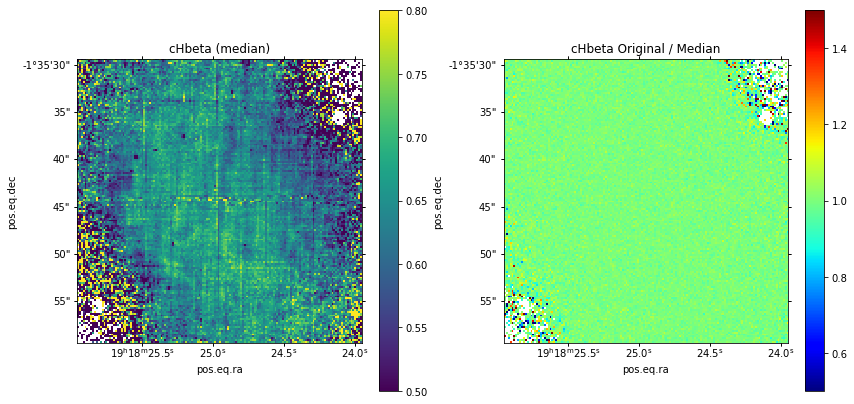

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw={'projection': PL.obs.wcs})
PL.red_cor_obs(EBV_min = 0., plot_=True, ax=ax1, vmin=0.5, vmax=.8, title='cHbeta (median)',
        label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)
image = PL.get_image(PL.obs.extinction.cHbeta, type_='orig') / PL.get_image(PL.obs.extinction.cHbeta, type_='median')
PL.plot(ax=ax2, image=image, vmin=0.5, vmax=1.5, cmap='jet', title='cHbeta Original / Median',
        label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)

/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:395: RuntimeWarning: invalid value encountered in subtract
  I_5755_new = I_5755 - R_5755_5679*I_5679
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:263: RuntimeWarning: invalid value encountered in log10
  this_image = np.log10(this_image)
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:432: RuntimeWarning: invalid value encountered in subtract
  I_7325_new = I_7325 - R_7325_REC * I_REC
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:436: RuntimeWarning: invalid value encountered in true_divide
  line.corrIntens = I_7325_new * I_7320 / I_7325
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:438: RuntimeWarning: invalid value encountered in true_divide
  line.corrIntens = I_7325_new * I_7330 / I_7325


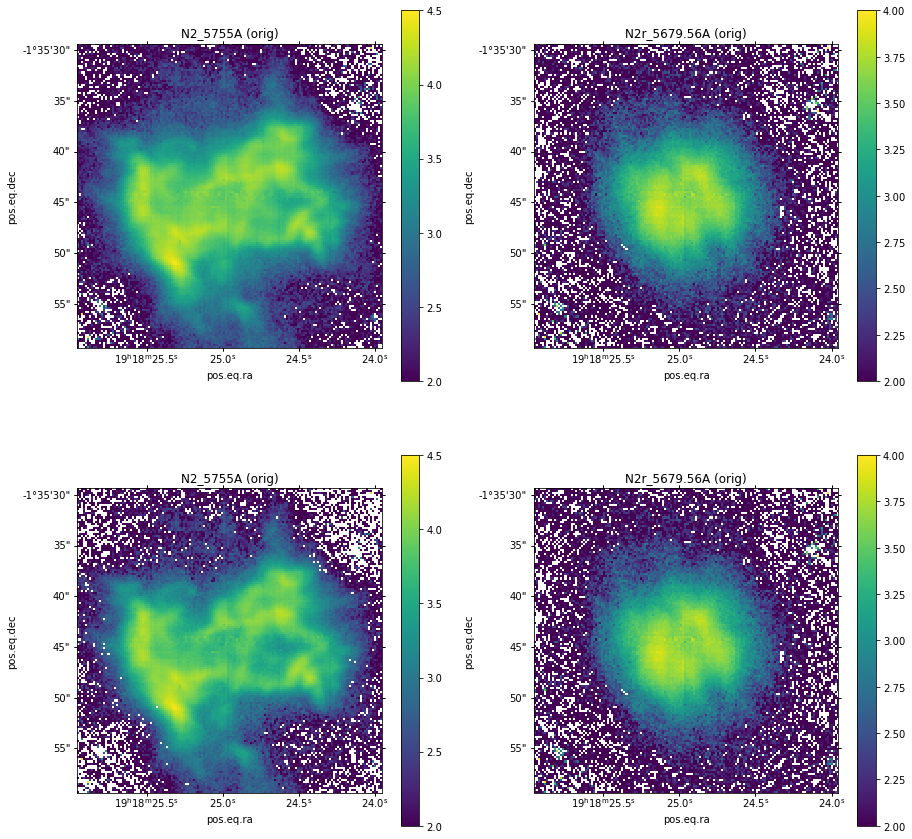

In [7]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15), 
                                                       subplot_kw={'projection': PL.obs.wcs})

PL.plot(ax=ax1, label='N2_5755A', type_='orig', use_log=True, vmin=2, vmax=4.5, SN_cut=None)
PL.plot(ax=ax2, label='N2r_5679.56A', type_='orig', use_log=True, vmin=2, vmax=4., SN_cut=None)
PL.correc_NII(Te_corr)
PL.plot(ax=ax3, label='N2_5755A', type_='orig', use_log=True, vmin=2, vmax=4.5, SN_cut=None)
PL.plot(ax=ax4, label='N2r_5679.56A', type_='orig', use_log=True, vmin=2, vmax=4., SN_cut=None)
PL.correc_OII(Te_corr, rec_label='O2r_4649.13A')

In [8]:
errors = PL.obs.getError()
intenses = PL.obs.getIntens()
for line in PL.obs.getSortedLines():
    error = PL.obs.reshape(errors[line.label])[:,:,0]
    intens = PL.obs.reshape(intenses[line.label])[:,:,0]
    mask = np.isfinite(error) & (intens > 0.1)
    print('{:15s} {:9.3f}  {:9.3f} '.format(line.label, np.nanmedian(intens[mask]), np.nanmedian(error[mask])))


Ar3_7136A        3601.498      0.053 
Ar3_7751A         847.443      0.092 
Ar4_4711A         280.921      0.560 
Ar4_4740A         307.916      0.375 
Ar5_7005A          43.950      0.711 
C1_8728A           55.000      0.484 
C2r_5342.0A       109.765      0.566 
C2r_6462.0A        86.101      0.468 
Cl3_5518A         229.314      0.283 
Cl3_5538A         203.771      0.310 
Cl4_7531A          75.226      0.454 
Cl4_8046A          90.032      0.377 
H1r_4861A       22099.354      0.052 
H1r_6563A       63426.211      0.050 
H1r_8750A         266.153      0.176 
H1r_9229A         597.658      0.104 
He1r_4713A        333.646      0.488 
He1r_5876A       5387.551      0.055 
He1r_6678A       1524.230      0.064 
He1r_7065A        788.602      0.082 
He1r_7281A        229.625      0.225 
He2r_4686A        381.150      0.343 
N1_5200A          803.139      0.164 
N2_5755A          488.696      0.144 
N2_6548A        12894.350      0.051 
N2_6584A        39186.197      0.050 
N2r_5676.02A

0.6346790056319204


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


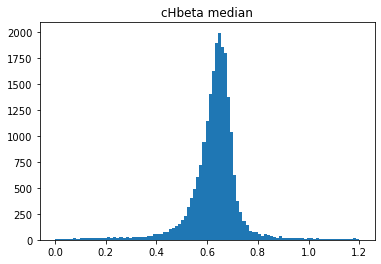

In [9]:
f, ax = plt.subplots()
ax.hist(PL.get_image(PL.obs.extinction.cHbeta, type_='median').ravel(), bins=np.linspace(0, 1.2, 100))
ax.set_title('cHbeta median')
print(np.nanmedian(PL.obs.extinction.cHbeta));

/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:263: RuntimeWarning: invalid value encountered in log10
  this_image = np.log10(this_image)
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:194: RuntimeWarning: divide by zero encountered in true_divide
  return self.get_image(label=label[0], type_=type_) / self.get_image(label=label[1], type_=type_)
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:194: RuntimeWarning: invalid value encountered in true_divide
  return self.get_image(label=label[0], type_=type_) / self.get_image(label=label[1], type_=type_)


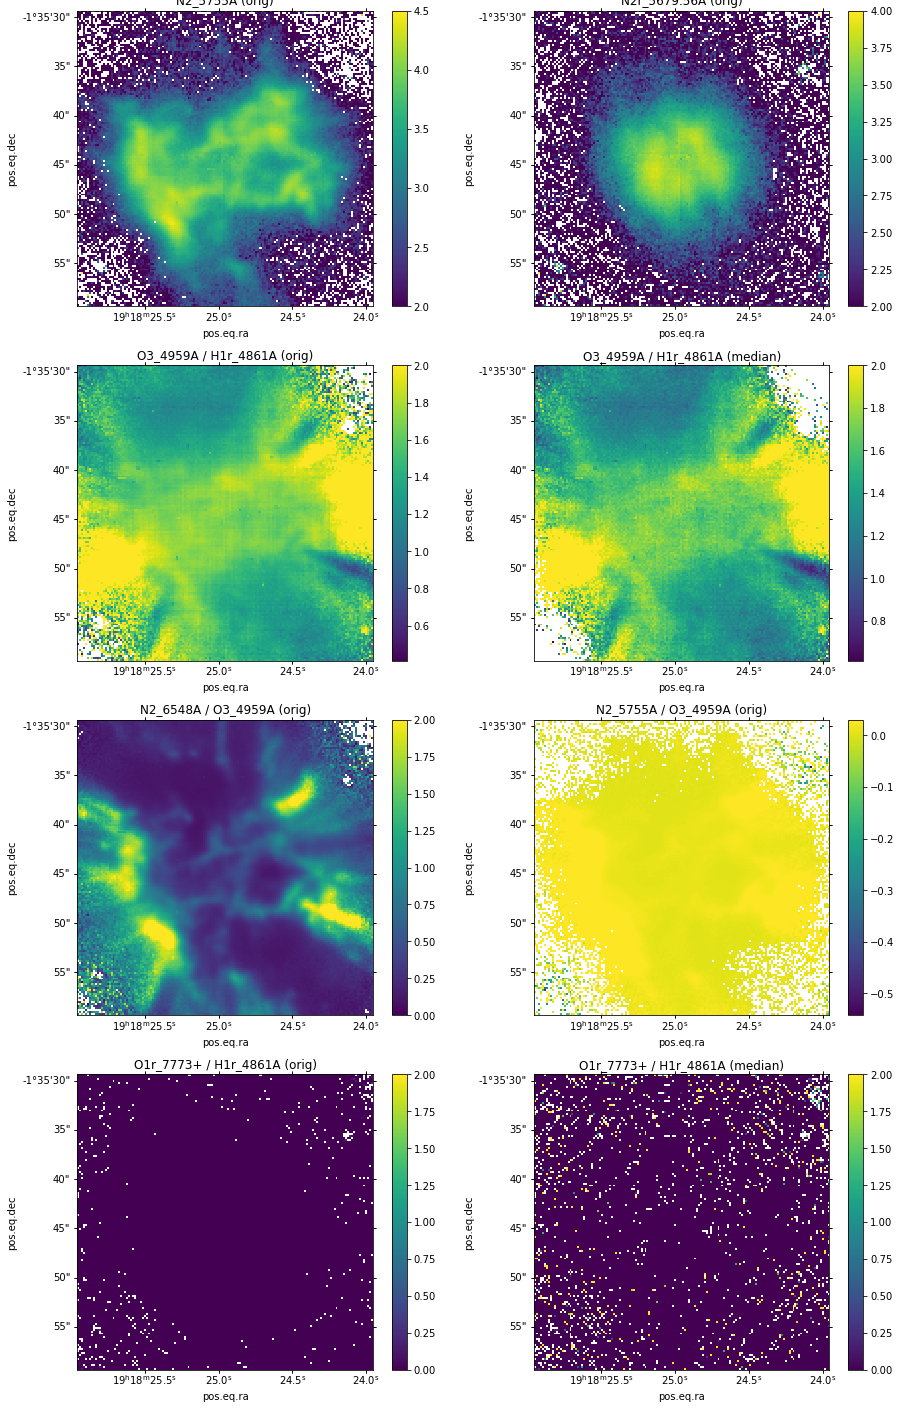

In [11]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 25), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax1, label='N2_5755A', type_='orig', use_log=True, vmin=2, vmax=4.5, SN_cut=None)
PL.plot(ax=ax2, label='N2r_5679.56A', type_='orig', use_log=True, vmin=2, vmax=4., SN_cut=None)
PL.plot(ax=ax3, label=('O3_4959A', 'H1r_4861A'), type_='orig', vmax=2, SN_cut=(2.5, 2.5))
PL.plot(ax=ax4, label=('O3_4959A', 'H1r_4861A'), type_='median', vmax=2, SN_cut=(4.5, 4.5))
PL.plot(ax=ax5, label=('N2_6548A', 'O3_4959A'), type_='orig', vmax=2, SN_cut=(2.5, 2.5))
PL.plot(ax=ax6, label=('N2_5755A', 'O3_4959A'), type_='orig', vmax=.03, SN_cut=(2.5, 2.5))
PL.plot(ax=ax7, label=('O1r_7773+', 'H1r_4861A'), type_='orig', use_log=True, vmin=0, vmax=2,  SN_cut=None)
PL.plot(ax=ax8, label=('O1r_7773+', 'H1r_4861A'), type_='median', use_log=True, vmin=0, vmax=2,  SN_cut=None)

In [12]:
pn.log_.level=2
PL.make_diags()
PL.diags.diags

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 'OII 4649.13/4661.63': ('O2r',
  "S('4649.13')/S('4661.63')",
  "RMS([SE('4649.13'), SE('4661.63')])"),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SIII] 6312/9069': ('S3', 'L(6312)/L(9069)', 'RMS([E(9069), E(6312)])'),
 '[ClIII] 5538/5518': ('Cl3', 'L(5538)/L(5518)', 'RMS([E(5518), E(5538)])'),
 '[ArIV] 4740/4711': ('Ar4', 'L(4740)/L(4711)', 'RMS([E(4711), E(4740)])')}

In [13]:
PL.diags.ANN_inst_kwargs['verbose']=True
PL.diags.ANN_init_kwargs['activation']='tanh' #identity’, ‘logistic’, ‘tanh’, ‘relu’
PL.diags.ANN_init_kwargs['solver']= 'lbfgs' #‘lbfgs’, ‘sgd’, ‘adam’
PL.diags.ANN_init_kwargs['hidden_layer_sizes'] = (10, 20, 10)

print(PL.n_obs)
pn.log_.timer('Starting', quiet=True)
PL.add_gCTD('N2S2', '[NII] 5755/6548', '[SII] 6731/6716')
PL.add_gCTD('N2S2_84', '[NII] 5755/6584', '[SII] 6731/6716')
PL.add_gCTD('S3Cl3', '[SIII] 6312/9069', '[ClIII] 5538/5518')
PL.add_gCTD('S3S2', '[SIII] 6312/9069', '[SII] 6731/6716')
PL.add_gCTD('S3Ar4', '[SIII] 6312/9069', '[ArIV] 4740/4711')
PL.add_T_He()
pn.log_.timer('ANN getCrossTemDen done')

1147500


<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


   None: ANN getCrossTemDen done in 3.898376941680908


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


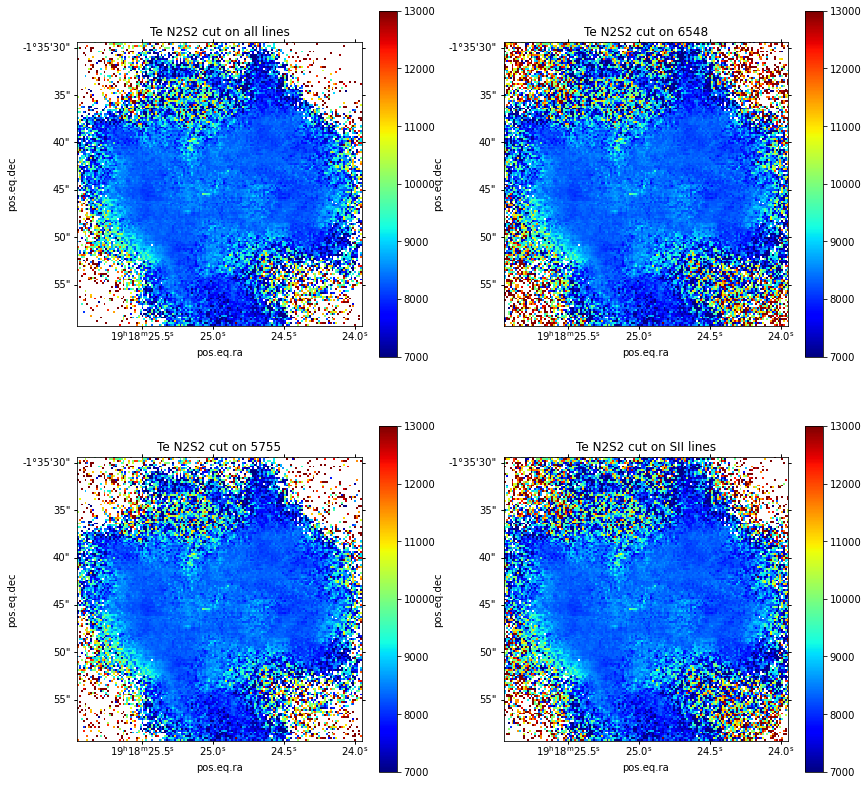

In [14]:
SN_cut = 2
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': PL.obs.wcs}, figsize=(14,14))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on all lines', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax2, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on 6548', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('N2_6548A'), SN_cut=SN_cut)
PL.plot(ax=ax3, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on 5755', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('N2_5755A'), SN_cut=SN_cut)
PL.plot(ax=ax4, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on SII lines', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('S2_6716A', 'S2_6731A'), SN_cut=SN_cut)

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


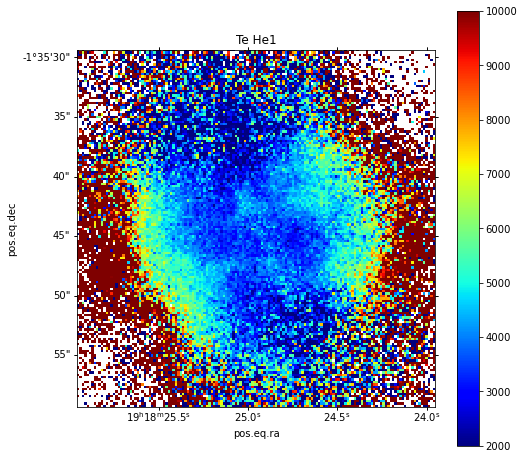

In [44]:
f, ax = plt.subplots(subplot_kw={'projection': PL.obs.wcs}, figsize=(8,8))
PL.plot(data=PL.TeNe['He1']['Ne'], vmin=2000, vmax=10000, title='Te He1', ax=ax, cmap='jet')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


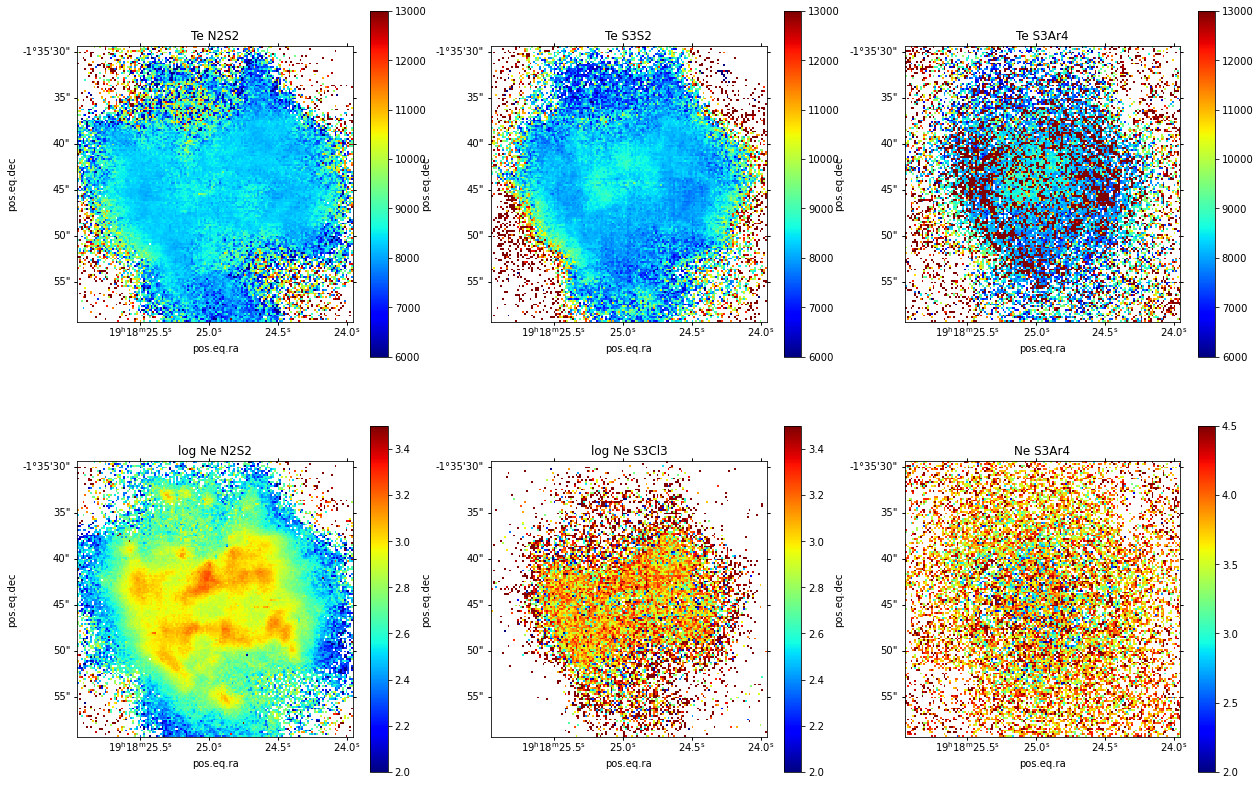

In [15]:
SN_cut = 2
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(21,14))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2', vmin=6000, vmax=13000, cmap='jet', 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax2, data=PL.TeNe['S3S2']['Te'], title='Te S3S2', vmin=6000, vmax=13000, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax3, data=PL.TeNe['S3Ar4']['Te'], title='Te S3Ar4', vmin=6000, vmax=13000, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None)
PL.plot(ax=ax4, data=np.log10(PL.TeNe['N2S2']['Ne']), title='log Ne N2S2', vmin=2, vmax=3.5, cmap='jet', 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax5, data=np.log10(PL.TeNe['S3Cl3']['Ne']), title='log Ne S3Cl3', vmin=2, vmax=3.5, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'Cl3_5518A', 'Cl3_5538A'), SN_cut=SN_cut, type_='orig')
PL.plot(ax=ax6, data=np.log10(PL.TeNe['S3Ar4']['Ne']), title='Ne S3Ar4', vmin=2, vmax=4.5, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median')
f.savefig(PL.PDF_name+'_TeNe.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


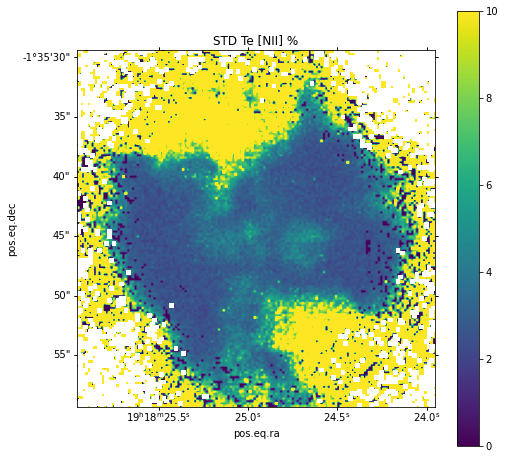

In [16]:
PL.plot_STD(data=PL.TeNe['N2S2']['Te'], vmin=0, vmax=10, title='STD Te [NII] %')

In [17]:
PL.log_.level=3
PL.set_abunds()

     Atom Ar3: Making atom object for Ar 3
     Atom Ar3: Reading atom data from ar_iii_atom_MB09.dat
     getLevelsNIST: Reading energies and stat weights from ar_iii_levels.dat
     Atom Ar3: Reading coll data from ar_iii_coll_MB09.dat
     None: Abund from Ar3_7136A done.
     Atom H1: Making rec-atom object for H 1
     Atom H1: HDF5 data read from /Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data_fits//h_i_rec_SH95.hdf5 using Astropy.table
     Atom H1: H1 recombination data read from h_i_rec_SH95.hdf5
     getLevelsNIST: Reading energies and stat weights from h_i_levels.dat
     None: Abund from Ar3_7751A done.
     Atom Ar4: Making atom object for Ar 4
     Atom Ar4: Reading atom data from ar_iv_atom_RGJ19.dat
     getLevelsNIST: Reading energies and stat weights from ar_iv_levels.dat
     Atom Ar4: Reading coll data from ar_iv_coll_RB97.dat
     None: Abund from Ar4_4711A done.
     None: Abund from Ar4_4740A done.
     Atom Ar5: Making atom object for Ar

In [18]:
intenses = PL.obs.getIntens()
for line in PL.obs.getSortedLines():
    intens = PL.obs.reshape(intenses[line.label])[:,:,0]
    abund = 12+np.log10(PL.obs.reshape(PL.abund_dic[line.label])[:,:,0])
    mask = np.isfinite(intens)
    mask2 = np.isfinite(abund)
    print('{:15s} {:9.2e} {:9.2f} {:9.2f}'.format(line.label, 
                                          intens[mask].sum(), 
                                          np.median(abund[mask2]), 
                                          np.nanstd(abund[mask2])))

Ar3_7136A        3.10e+08      6.36      0.27
Ar3_7751A        7.06e+07      6.30      0.55
Ar4_4711A        2.35e+07      5.67      1.82
Ar4_4740A        1.58e+07      5.75      1.60
Ar5_7005A        9.64e+05      4.54      1.80
C1_8728A         1.47e+06      6.13      1.47
C2r_5342.0A      3.93e+06      9.58      1.78
C2r_6462.0A      3.74e+06      9.34      1.43
Cl3_5518A        1.39e+07      5.19      0.97
Cl3_5538A        1.16e+07      5.21      1.14
Cl4_7531A        2.82e+06      4.86      1.36
Cl4_8046A        4.89e+06      4.51      1.20
H1r_4861A        1.89e+09     12.00      0.00
H1r_6563A        5.38e+09     11.99      0.01
H1r_8750A        1.92e+07     11.97      0.76
H1r_9229A        4.36e+07     11.95      0.53
He1r_4713A       1.88e+07     11.33      1.79
He1r_5876A       4.44e+08     11.21      0.23
He1r_6678A       1.23e+08     11.20      0.18
He1r_7065A       7.18e+07     11.16      0.21
He1r_7281A       1.56e+07     11.07      0.54
He2r_4686A       1.14e+08      9.1

<ipython-input-18-c79a421649ca>:4: RuntimeWarning: divide by zero encountered in log10
  abund = 12+np.log10(PL.obs.reshape(PL.abund_dic[line.label])[:,:,0])
<ipython-input-18-c79a421649ca>:4: RuntimeWarning: invalid value encountered in log10
  abund = 12+np.log10(PL.obs.reshape(PL.abund_dic[line.label])[:,:,0])


<ipython-input-19-2a84cd68f080>:4: RuntimeWarning: divide by zero encountered in log10
  to_show = 12+np.log10(PL.abund_dic[line.label])
<ipython-input-19-2a84cd68f080>:4: RuntimeWarning: invalid value encountered in log10
  to_show = 12+np.log10(PL.abund_dic[line.label])


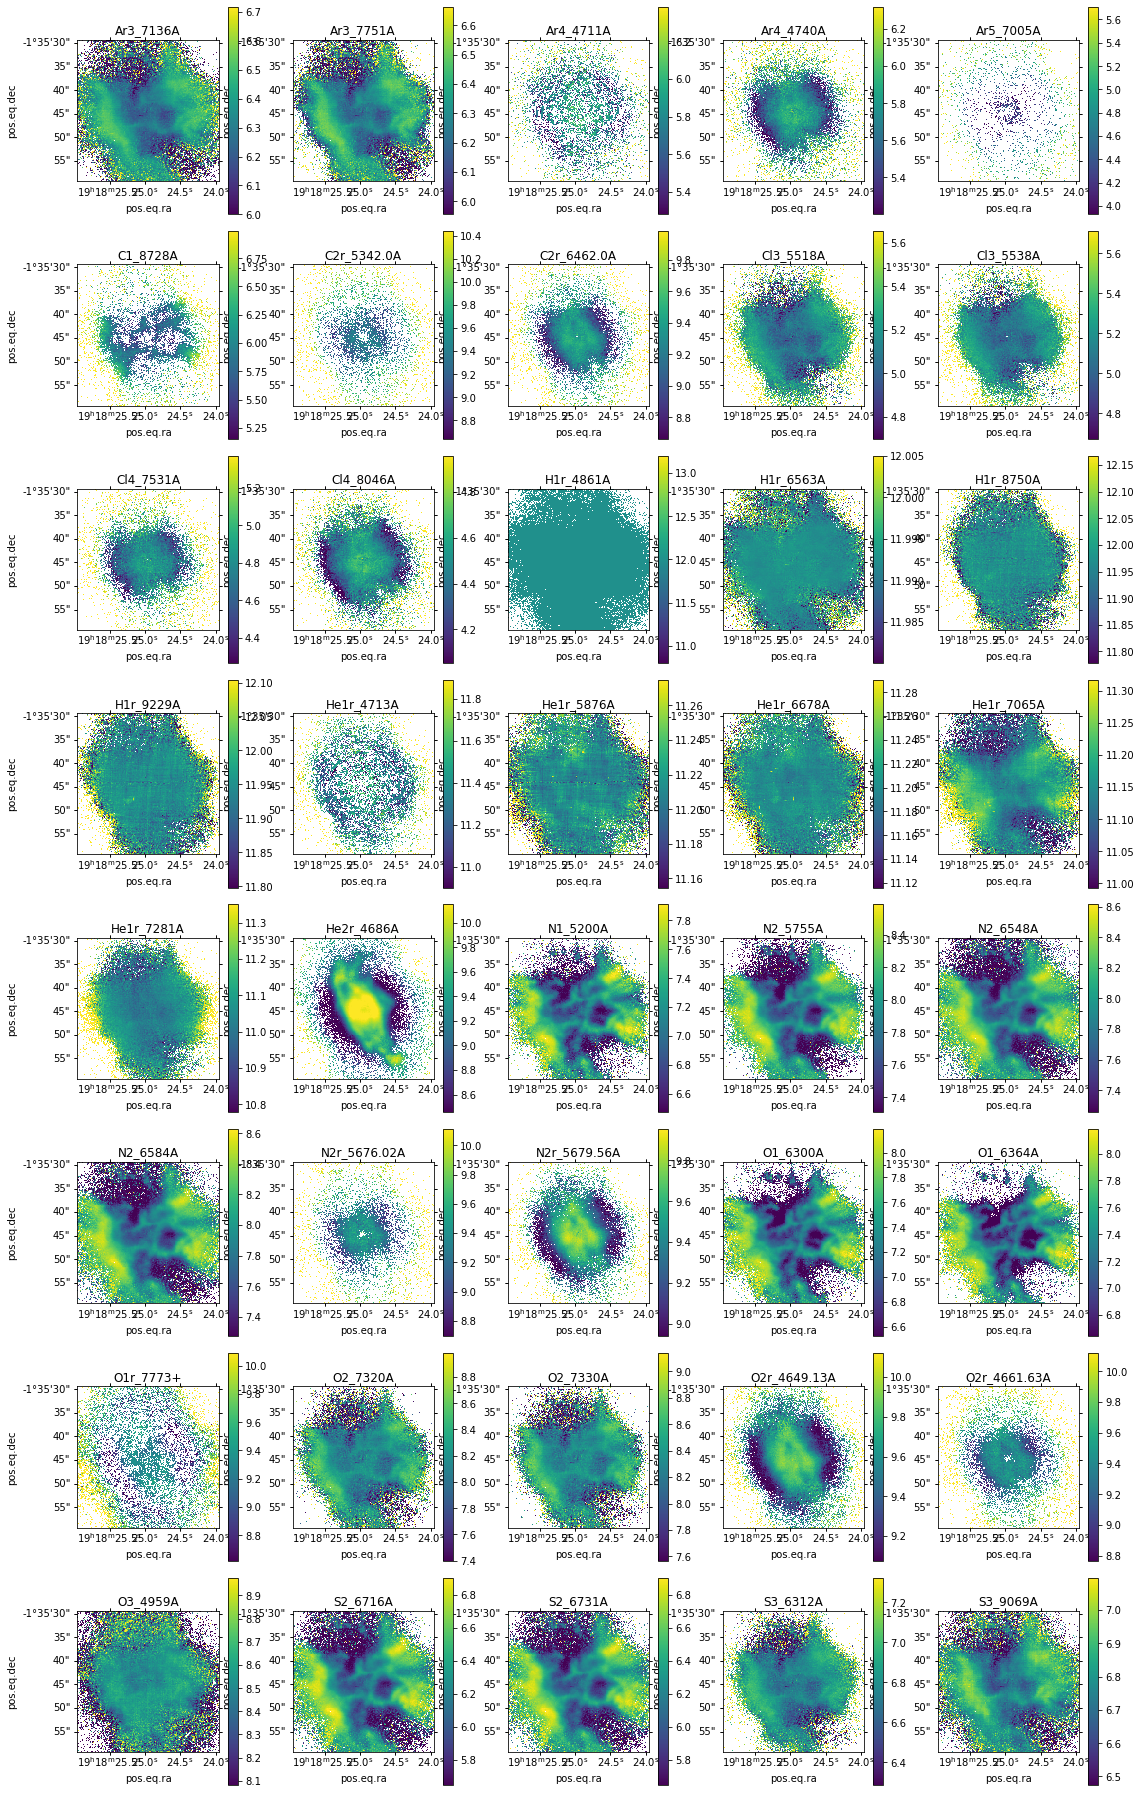

In [19]:
f, axes = plt.subplots(8,5,figsize=(15,25), subplot_kw={'projection': PL.obs.wcs})
for line, ax in zip(PL.obs.getSortedLines()[0:40], axes.ravel()):
    mask = PL.get_mask_SN(line.label, 2.5)
    to_show = 12+np.log10(PL.abund_dic[line.label])
    to_show[np.isinf(to_show)] = np.nan
    med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
    to_show[to_show < (med - 6)] = np.nan
    med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
    std = np.nanstd(PL.get_image(to_show, type_='orig')[~mask])
    vmin = med - 1.5 * std
    vmax = med + 1.5 * std
    #print(line.label, max_to_show, med, std, vmin, vmax, mask.sum())
    PL.plot(data=to_show, title=line.label, ax=ax, vmin=vmin, vmax=vmax, type_='orig', mask=mask)
f.tight_layout()
f.savefig(PL.PDF_name+'_abunds.pdf')

<ipython-input-20-5e1d95685806>:4: RuntimeWarning: divide by zero encountered in log10
  to_show = 12+np.log10(PL.abund_dic[line.label])
<ipython-input-20-5e1d95685806>:4: RuntimeWarning: invalid value encountered in log10
  to_show = 12+np.log10(PL.abund_dic[line.label])
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


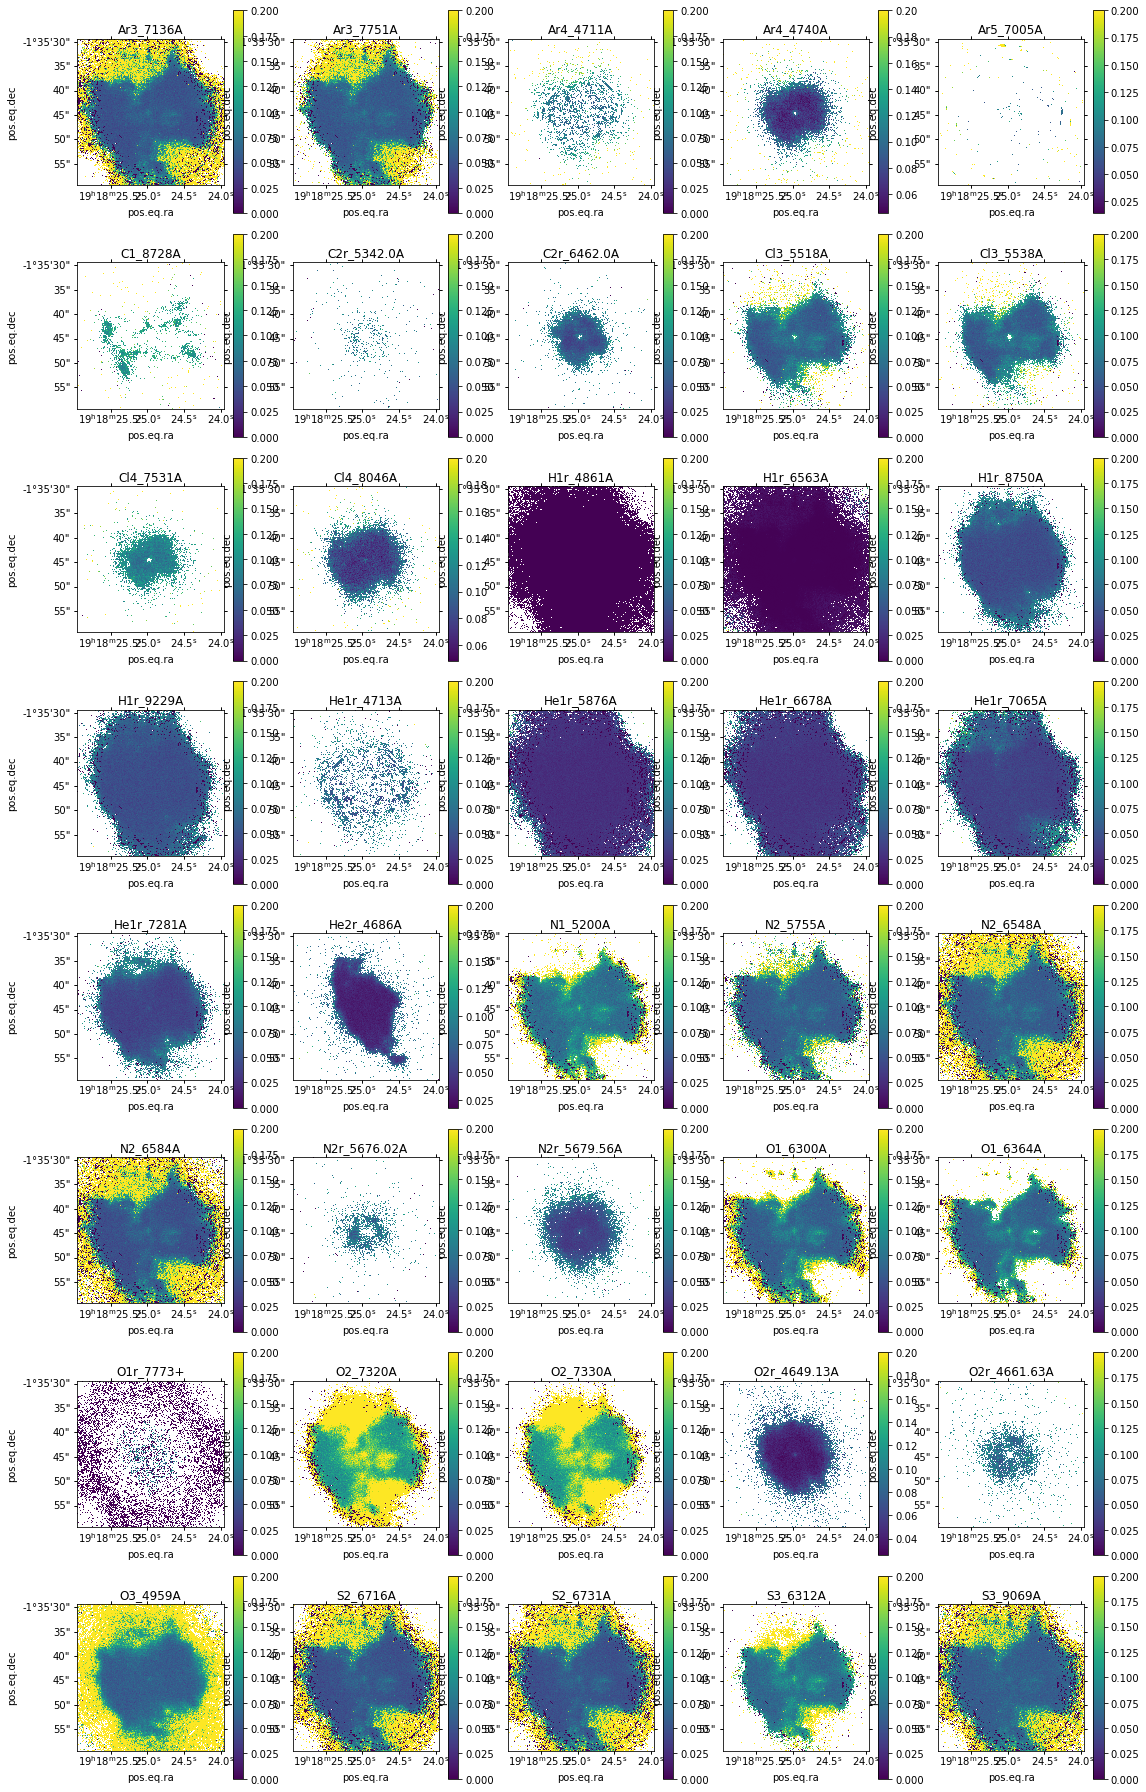

In [20]:
f, axes = plt.subplots(8,5,figsize=(15,25), subplot_kw={'projection': PL.obs.wcs})
for line, ax in zip(PL.obs.getSortedLines()[0:40], axes.ravel()):
    mask = PL.get_mask_SN(line.label, 4.5)
    to_show = 12+np.log10(PL.abund_dic[line.label])
    to_show[np.isinf(to_show)] = np.nan
    med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
    to_show[to_show < (med - 6)] = np.nan
    to_show
    med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
    std = np.nanstd(PL.get_image(to_show, type_='orig')[~mask])
    vmin = med - 1.5 * std
    vmax = med + 1.5 * std
    #print(line.label, max_to_show, med, std, vmin, vmax, mask.sum())
    PL.plot(data=to_show, title=line.label, ax=ax, type_='std', mask=mask, vmax=0.2)
f.tight_layout()
f.savefig(PL.PDF_name+'_abunds_uncert.pdf')

<ipython-input-27-7ae16b0916a2>:3: RuntimeWarning: divide by zero encountered in true_divide
  ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7330A']+PL.abund_dic['O2_7330A']) * 2)
<ipython-input-27-7ae16b0916a2>:3: RuntimeWarning: invalid value encountered in true_divide
  ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7330A']+PL.abund_dic['O2_7330A']) * 2)
<ipython-input-27-7ae16b0916a2>:3: RuntimeWarning: divide by zero encountered in log10
  ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7330A']+PL.abund_dic['O2_7330A']) * 2)
<ipython-input-27-7ae16b0916a2>:3: RuntimeWarning: invalid value encountered in log10
  ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7330A']+PL.abund_dic['O2_7330A']) * 2)
<ipython-input-27-7ae16b0916a2>:4: RuntimeWarning: divide by zero encountered in log10
  ADF_Opp = np.log10(PL.abund_dic['O2r_4649.13A'] / PL.abund_dic['O3_4959A'])
<ipython-input-27-7ae16b0916a2>:4: RuntimeWarning: invali

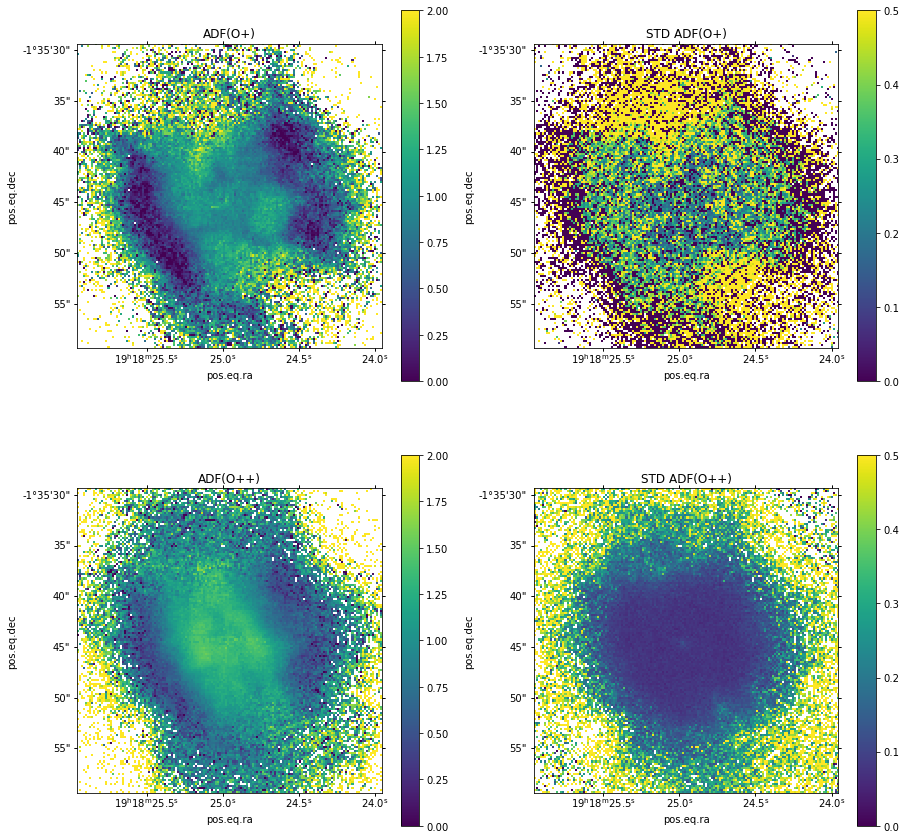

In [27]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15), subplot_kw={'projection': PL.obs.wcs})

ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7330A']+PL.abund_dic['O2_7330A']) * 2)
ADF_Opp = np.log10(PL.abund_dic['O2r_4649.13A'] / PL.abund_dic['O3_4959A'])

PL.plot(data=ADF_Op, title='ADF(O+)', ax=ax1, vmin=0, vmax=2, type_='orig')
PL.plot(data=ADF_Op, title='STD ADF(O+)', ax=ax2, vmin=0, vmax=.5, type_='std')
PL.plot(data=ADF_Opp, title='ADF(O++)', ax=ax3, vmin=0, vmax=2, type_='orig')
PL.plot(data=ADF_Opp, title='STD ADF(O++)', ax=ax4, vmin=0, vmax=.5, type_='std')